In [1]:
import numpy as np
from keras.datasets import reuters
from keras import models, layers, optimizers

# Cargue de datos

Dataset de noticias de reuters clasificado en 46 diferentes temas.

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


# Preprocesamiento

In [4]:
# Diccionario palabras y token

word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
word_index

# Ver las palabras
for _ in train_data[0]:
    print(word_index.get(_ -3))

550378/550378 [==============================] - 0s 0us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [5]:
train_data.shape # Se observa que no es un tensor, por lo que hay que vectorizar. Para esto, revisar si es más eficiente usar Word Embeddings.**

(8982,)

In [7]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [8]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [10]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Estructuración del modelo

In [29]:
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
# Softmax es la recomendada para la clasificación multiple, pues arroja la probabilidad de cada una de las posibles salidas.

In [30]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [31]:
x_val = x_train[:1000] # datos de validación
partial_x_train = x_train[1000:]

y_val = y_train[:1000] # datos de validación
partial_y_train = y_train[1000:]

## Entrenamiento

In [32]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=9, batch_size=512,
                    validation_data=(x_val, y_val))

# Entrenar el modelo en 4 iteracciones en lotes que tengan 512 registros, haciendo a la vez la validacion

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.7433 - accuracy: 0.5069 - val_loss: 1.8465 - val_accuracy: 0.6270
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.5466 - accuracy: 0.6824 - val_loss: 1.3869 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1866 - accuracy: 0.7326 - val_loss: 1.2047 - val_accuracy: 0.7160
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.9702 - accuracy: 0.7859 - val_loss: 1.0832 - val_accuracy: 0.7600
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8058 - accuracy: 0.8270 - val_loss: 1.0174 - val_accuracy: 0.7780
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6722 - accuracy: 0.8557 - val_loss: 0.9623 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5602 - accuracy: 0.8835 - val_loss: 0.9288 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

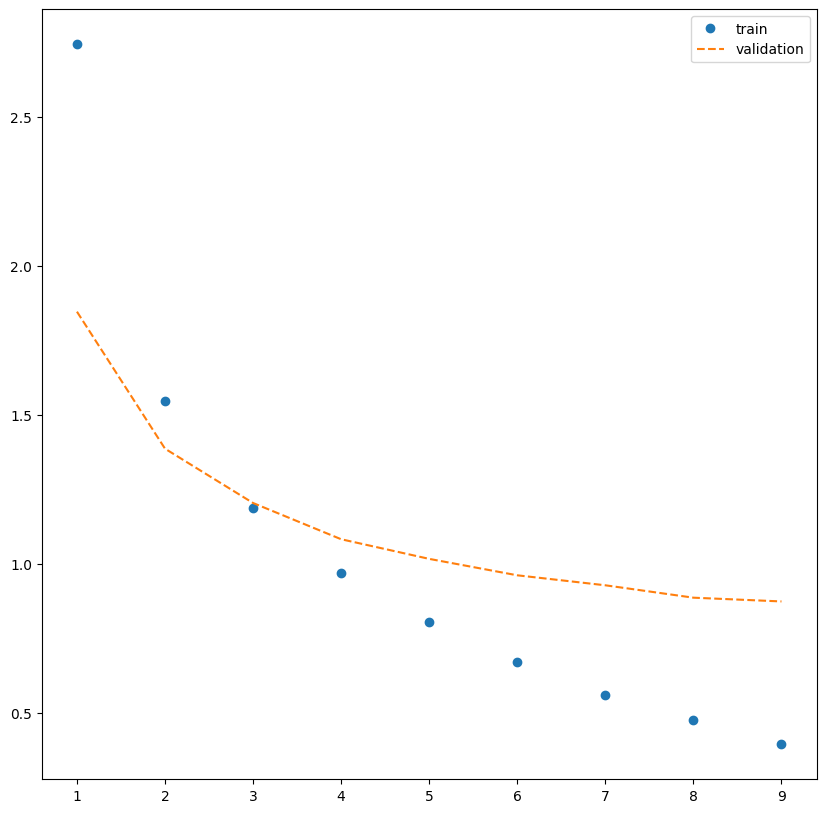

In [33]:
# Funcion de perdida

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


fig = plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'train')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

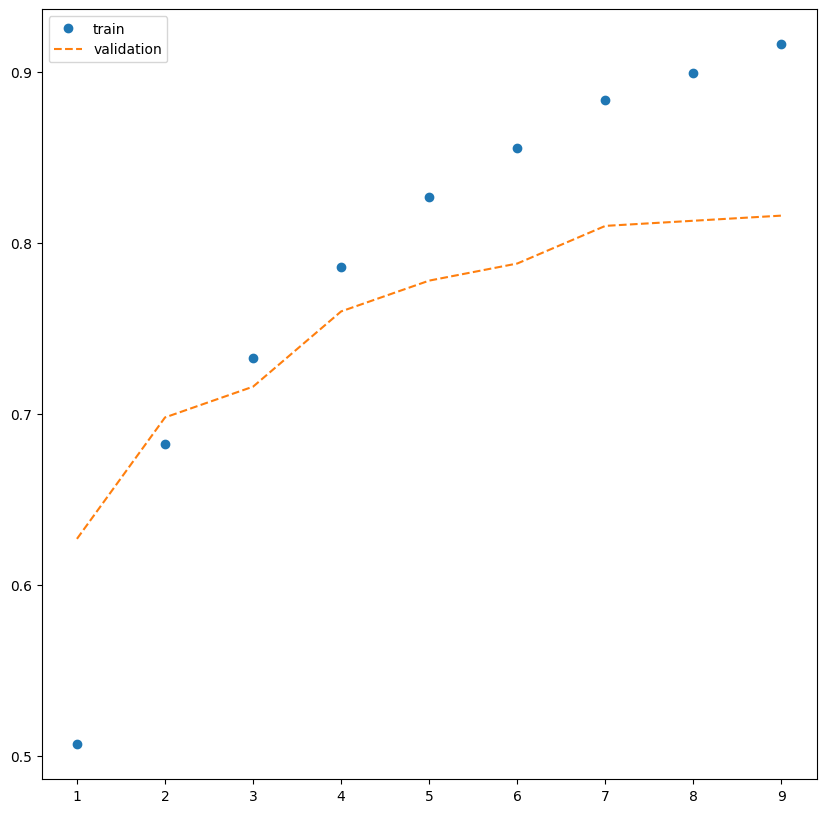

In [34]:
# Accuracy

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']


fig = plt.figure(figsize = (10,10))
epoch = range(1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'train')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9421 - accuracy: 0.7863


[0.9421331286430359, 0.7862867116928101]

## Predicciones

In [36]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [37]:
predictions[0] # 46 resultados, donde cada uno tiene un peso (probabilidad)

array([6.8356800e-05, 7.3344883e-05, 3.8286296e-05, 7.7513093e-01,
       2.1576945e-01, 1.9751608e-06, 2.0582296e-05, 1.8517973e-04,
       2.5020540e-03, 3.2274533e-04, 9.6768581e-06, 1.7131453e-04,
       8.9825853e-06, 6.4004736e-04, 2.5699006e-05, 6.2423314e-05,
       2.2080466e-03, 7.9424615e-05, 8.4260268e-05, 7.7478799e-05,
       6.8423856e-04, 3.6622972e-05, 4.0149342e-05, 4.6174999e-05,
       1.6745900e-05, 4.1754360e-05, 2.4203971e-05, 1.4110272e-05,
       1.7576577e-04, 2.1784886e-04, 1.6620441e-04, 1.1278045e-04,
       2.0463933e-06, 2.6672073e-05, 3.2065698e-04, 3.9810842e-05,
       1.3233240e-04, 2.5932548e-05, 3.4992303e-05, 1.4210062e-04,
       1.9183310e-05, 1.4886394e-04, 1.2582449e-05, 1.8757844e-05,
       1.0980071e-05, 8.1792132e-06], dtype=float32)

In [38]:
np.sum(predictions[0]) # Todas las probabilidades suman uno

0.99999994

In [39]:
np.argmax(predictions[0]) # Saber la posición de la probabilidad más alta

3